# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = pd.read_csv(r"data_result\data_cluster_numerik.csv", delimiter=",")
data

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,0,126,14.09,684,1,36,365,186,14,0,70.0,0,81.0,1.0,5112.21,105,1
1,1,450,376.24,1192,1,15,50,82,51,0,68.0,0,141.0,1.0,13758.91,192,0
2,2,18,126.29,1276,1,23,229,343,8,2,19.0,3,56.0,1.0,1122.35,41,1
3,3,68,184.50,823,1,33,182,300,1,2,26.0,3,25.0,1.0,8569.06,163,0
4,4,406,13.45,1959,0,1,298,501,90,2,26.0,3,198.0,1.0,7429.40,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,2507,293,856.21,772,0,7,605,325,71,1,33.0,0,109.0,1.0,12690.79,305,2
2508,2508,318,251.54,568,1,40,395,448,28,1,48.0,0,177.0,1.0,254.75,318,1
2509,2509,93,28.63,1547,1,36,93,474,86,1,56.0,2,146.0,1.0,3382.91,136,1
2510,2510,116,185.97,379,1,10,614,326,40,2,23.0,3,19.0,1.0,1776.91,358,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   int64  
 1   AccountID                2512 non-null   int64  
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   int64  
 4   TransactionType          2512 non-null   int64  
 5   Location                 2512 non-null   int64  
 6   DeviceID                 2512 non-null   int64  
 7   IP Address               2512 non-null   int64  
 8   MerchantID               2512 non-null   int64  
 9   Channel                  2512 non-null   int64  
 10  CustomerAge              2512 non-null   float64
 11  CustomerOccupation       2512 non-null   int64  
 12  TransactionDuration      2512 non-null   float64
 13  LoginAttempts            2512 non-null   float64
 14  AccountBalance          

In [4]:
data.Cluster.value_counts()
# data.AccountID.value_counts()

Cluster
1    1156
0     982
2     374
Name: count, dtype: int64

In [5]:
print(data.shape)
print(data.describe())

(2512, 17)
       TransactionID    AccountID  TransactionAmount  TransactionDate  \
count    2512.000000  2512.000000        2512.000000      2512.000000   
mean     1255.500000   246.637739         297.593778      1255.500000   
std       725.296261   143.353390         291.946243       725.296261   
min         0.000000     0.000000           0.260000         0.000000   
25%       627.750000   123.000000          81.885000       627.750000   
50%      1255.500000   250.000000         211.140000      1255.500000   
75%      1883.250000   369.000000         414.527500      1883.250000   
max      2511.000000   494.000000        1919.110000      2511.000000   

       TransactionType     Location     DeviceID   IP Address   MerchantID  \
count      2512.000000  2512.000000  2512.000000  2512.000000  2512.000000   
mean          0.773885    21.032643   337.732882   297.083201    48.523885   
std           0.418398    12.253549   198.210671   169.659435    29.032470   
min           0.000

# **3. Data Selecting**

In [6]:
data.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
Cluster                       3
dtype: int64

In [ ]:
# Pilih kolom berdasarkan pengamatan situasi di kaggle datasetnya mengenai Transaksi Bank untuk mendeteksi kejahatan atau menghapus data yang tidak relevan untuk analisis
# data_x = data[["TransactionType", "Location", "Channel", "CustomerOccupation"]]
data.drop(columns=["TransactionID","AccountID","TransactionDate","MerchantID","DeviceID","IP Address","TransactionID","TransactionDuration","Cluster"])

,TransactionAmount,TransactionType,Location,MerchantID,Channel,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,1,36,14,0,70.0,0,1.0,5112.21,105
1,376.24,1,15,51,0,68.0,0,1.0,13758.91,192
2,126.29,1,23,8,2,19.0,3,1.0,1122.35,41
3,184.50,1,33,1,2,26.0,3,1.0,8569.06,163
4,13.45,0,1,90,2,26.0,3,1.0,7429.40,16
...,...,...,...,...,...,...,...,...,...,...
2507,856.21,0,7,71,1,33.0,0,1.0,12690.79,305
2508,251.54,1,40,28,1,48.0,0,1.0,254.75,318
2509,28.63,1,36,86,1,56.0,2,1.0,3382.91,136
2510,185.97,1,10,40,2,23.0,3,1.0,1776.91,358


# **4. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [37]:
category_features = ["TransactionType","Location","Channel", "CustomerOccupation", "CustomerAge", "TransactionDate", "LoginAttempts", "PreviousTransactionDate"]
x = data.drop(columns=["MerchantID","TransactionID","AccountID","TransactionDate","DeviceID","IP Address","TransactionID","TransactionDuration","Cluster", "PreviousTransactionDate"])
# x = data[category_features]
y = data['Cluster']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Length x_train:", x_train.shape[0])
print("Length y_train:",y_train.shape[0])
print("Length x_test:", x_test.shape[0])
print("Length y_test:", y_test.shape[0])

Length x_train: 2009
Length y_train: 2009
Length x_test: 503
Length y_test: 503


In [38]:
x

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,1.0,5112.21
1,376.24,1,15,0,68.0,0,1.0,13758.91
2,126.29,1,23,2,19.0,3,1.0,1122.35
3,184.50,1,33,2,26.0,3,1.0,8569.06
4,13.45,0,1,2,26.0,3,1.0,7429.40
...,...,...,...,...,...,...,...,...
2507,856.21,0,7,1,33.0,0,1.0,12690.79
2508,251.54,1,40,1,48.0,0,1.0,254.75
2509,28.63,1,36,1,56.0,2,1.0,3382.91
2510,185.97,1,10,2,23.0,3,1.0,1776.91


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

knn = KNeighborsClassifier()
# dc = DecisionTreeClassifier(max_depth=10, random_state=42)
dc = DecisionTreeClassifier()
# rf = RandomForestClassifier(max_depth=10, random_state=42)
rf = RandomForestClassifier()
svm = SVC()
gnb = GaussianNB()

In [40]:
def train_model(classification, x_train, y_train):
    # model = Pipeline([('vectorizer',vect),('classifier', classification)])
    trained = classification.fit(x_train, y_train) 
    return trained

classifications = [knn, dc, rf, svm, gnb]
# classifications = [dc, rf]

for i in range(len(classifications)):
    trained = train_model(classifications[i], x_train, y_train)
print("Pelatihan berbagai jenis model sudah selesai")

Pelatihan berbagai jenis model sudah selesai


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

CONFUSION MATRIX
KNeighborsClassifier()


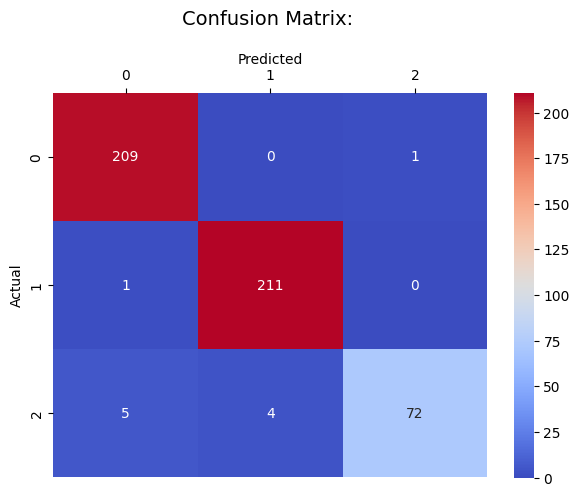

DecisionTreeClassifier()


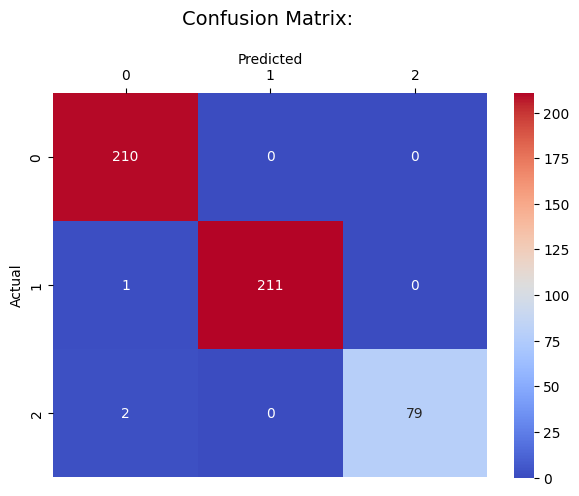

RandomForestClassifier()


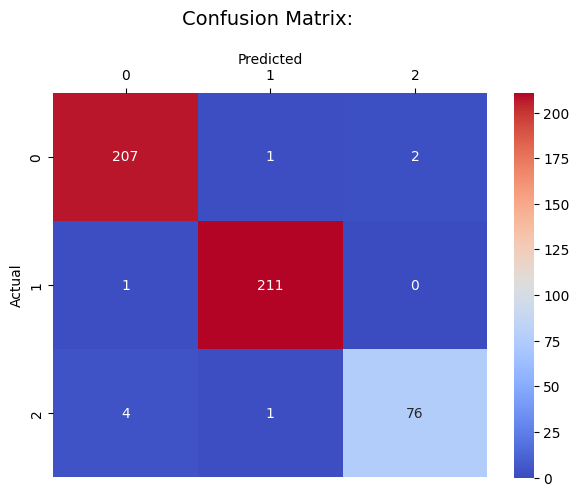

SVC()


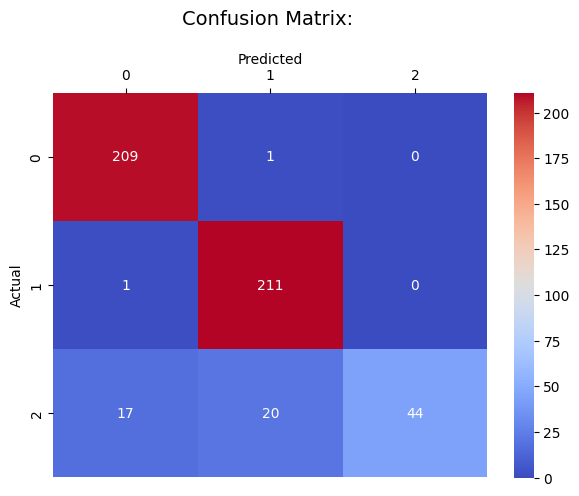

GaussianNB()


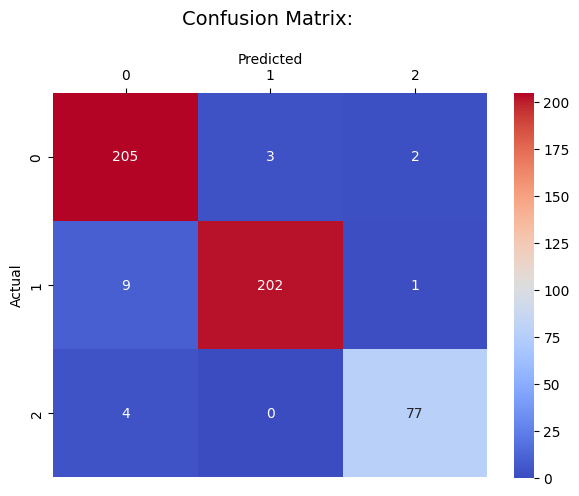

EVALUATION
                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.978131   0.979930  0.959803  0.968962
1            Decision Tree (DT)  0.994036   0.995305  0.990197  0.992681
2            Random Forest (RF)  0.982107   0.980461  0.973090  0.976653
3  Support Vector Machine (SVM)  0.922465   0.943396  0.844577  0.870324
4              Naive Bayes (NB)  0.962227   0.962744  0.959879  0.961097


In [41]:
print("CONFUSION MATRIX")
def compute_metrics(model, x_test, y_test):

    y_pred = model.predict(x_test)
    labels_test = np.sort(y_test.unique())
    cm = confusion_matrix(y_test, y_pred, labels=labels_test)
    # cm = confusion_matrix(y_test, y_pred)
    # tn, fp, fn, tp = cm.ravel()
    print(model)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=labels_test, yticklabels=labels_test)
    plt.title("Confusion Matrix: ", fontsize=14, pad=20)
    plt.gca().xaxis.set_label_position('top')
    plt.ylabel('Actual', fontsize=10)
    plt.xlabel('Predicted', fontsize=10)
    plt.gca().xaxis.tick_top()
    plt.show()

    results = {
        'Confusion Matrix': cm,
        # 'True Positive (TP)': tp,
        # 'False Positive (FP)': fp,
        # 'False Negative (FN)': fn,
        # 'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
        # 'Check UnderFitting': detect_underfitting(model)
    }
    
    return results
    
    
results = {
    'K-Nearest Neighbors (KNN)': compute_metrics(knn, x_test, y_test),
    'Decision Tree (DT)': compute_metrics(dc, x_test, y_test),
    'Random Forest (RF)': compute_metrics(rf, x_test, y_test),
    'Support Vector Machine (SVM)': compute_metrics(svm, x_test, y_test),
    'Naive Bayes (NB)': compute_metrics(gnb, x_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
summary_df = pd.DataFrame(rows)
print("EVALUATION")
print(summary_df)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Identifikasi kelemahan model, seperti:
  - Support Vector Machine memiliki F1-Score yang rendah dikarenakan recall juga rendah, sehingga Support Vector Machine tidak memiliki unggul untuk memprediksi value.
  - Berbagai jenis model kemungkinan mengalami overfitting
2. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
  - Mengembangkan codingan lebih lanjut seperti tuning atau avoid overfitting untuk memastikan hasil akurasi yang masuk akal, dan juga F1-Score. Sekaligus memperhatikan dataset yang sudah dihasilkan oleh clustering lebih konsisten karena setiap tahap berubah sedikit akan mempengaruhi kinerja klasifikasi maupun clustering